In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
from pylab import rcParams
rcParams['figure.figsize'] = 50, 20
import nltk
from nltk.corpus import stopwords
import re
import time
start=time.time()
nltk.download('stopwords')
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from statistics import mean 

[nltk_data] Downloading package stopwords to C:\Users\Agnes
[nltk_data]     Sandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Functions to clean skills data and make a vocabulary for skills vectorization

def text_scrubber(values):

    result = []
    for string in values:
        # Regex as explained above
        temp = re.sub('(\(.*\))', '', string)
        temp = re.sub('&#39;|\x92', '\'', temp)
        temp = re.sub(' &amp; |&amp;|\x95|:|;|&|\.|/| and ', ',', temp)
        temp = re.sub('\w*:\s+', ', ', temp)
        
        result.append(temp)
        
    return result

def tokenizer(df):
    
    # Custom stop words that come up very often but don't say much about the job title.
    stops = ['manager', 'nice' 'responsibilities', 'used', 'skills', 'duties', 'work', 'worked', 'daily', 'next','magic','world','interview',
             'services', 'job', 'good','using', '.com', 'end', 'prepare', 'prepared', 'lead', 'requirements','#39','see below','yes'] + list(stopwords.words('english'))
    values, ids, resume_ids = [],[],[]
    count = 0
    for idx, row in df.iterrows():
        
        # Split on commas
        array = row['skills']
        array=str(array)
        array=array.lower().split(',')
        for x in array:
            # make sure the value is not empty or all numeric values or in the stop words list
            if x != '' and not x.lstrip().rstrip() in stops and not x.lstrip().rstrip().isdigit():
                # make sure single character results are the letter 'C' (programming language)
                if len(x) > 1 or x == 'C':
                    # drop stuff > 4 gram
                    if len(x.split(' ')) <= 4:
                        # update lists
                        
                        values.append(x.lstrip().rstrip())
                        ids.append(count)
                        count+=1
    
    # New dataframe with updated values.
    result_df = pd.DataFrame()
    
    result_df['skills'] = values
    return result_df

df = pd.read_csv("Documents/data/job_sample.csv",encoding='cp850')

#df['skills'] = text_scrubber(df['skills'])
test_df = tokenizer(df)

voc = test_df['skills'].unique()
print(voc)

['linux/unix' 'network monitoring' 'incident response' ...
 '"business analyst" and aem' 'lab technician' 'manual qa']


In [3]:
# Vectorize text of job descriptions, put resulting matrix into dataframe
#for x in df['jobdescription']:
    #df['jobdescription'] = [x.replace("&nbsp;"," ").replace("\x92"," ").replace("\x95"," ").replace('&amp;'," ") \
                            # .replace('*'," ").replace("."," ").replace("co&#39;s","").replace("\xae&quot;","") \
                            # .replace("&#39;s","").replace("&quot;","").replace("?","").replace("&#39;s","") \
                            # .replace("@","").replace("\x96","") ]
df = pd.read_csv("Documents/data/job_sample.csv",encoding='cp850')

mine = ['manager', 'amp', 'nbsp', 'responsibilities', 'used', 'skills', 'duties', 'work', 'worked', 'daily','services', 'job', 'using', 'com', 'end', 'prepare', 'prepared', 'lead', 'requirements','summary','Job Role','Position']
vec = TfidfVectorizer(analyzer='word', ngram_range=(1,2), token_pattern='[a-zA-z]{3,50}', max_df=0.2, min_df=2, max_features=10000, stop_words=text.ENGLISH_STOP_WORDS.union(mine), decode_error='ignore', vocabulary=None, binary=False)
df['skills']=df['skills']+df['jobdescription']+df['jobtitle']
description_matrix2 = vec.fit_transform(df['skills'].values.astype('U'))
description_matrix2 = pd.DataFrame(description_matrix2.todense())
description_matrix2.columns = vec.get_feature_names()

In [4]:
vec2 = TfidfVectorizer(vocabulary=voc, decode_error='ignore')
df['skills']=df['skills']+df['jobdescription']+df['jobtitle']
skills_matrix2 = vec2.fit_transform(df['skills'].values.astype('U'))
skills_matrix2 = pd.DataFrame(skills_matrix2.todense())
skills_matrix2.columns = vec2.get_feature_names()

In [5]:
jobtitle_matrix = pd.concat([skills_matrix2, description_matrix2], axis=1)
jobtitle_matrix

,linux/unix,network monitoring,incident response,systems administration,security accessment,enterprise solutions architecture,business inteligence,reports,reporting,java,...,yes required,yessponsor,yessponsor candidates,young,yrs,yrs experience,zero,zone,zones,zulily
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042709,0.000000,0.177428,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086078,0.229843,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.205873,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043441,0.000000,0.108282,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [6]:
# Run PCA to reduce number of features

pca = PCA(n_components=1000, random_state=42)
comps = pca.fit_transform(jobtitle_matrix)

In [7]:
# Put the components into a dataframe

comps = pd.DataFrame(comps)

In [8]:
# Cluster job titles based on components derived from feature matrix

cltr = AgglomerativeClustering(n_clusters=8)
cltr.fit(comps)

# Add new column containing cluster number to sample, comps, and feature matrix dataframes

df['cluster_no'] = cltr.labels_
X = comps
y = df['cluster_no']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
lr = LogisticRegression(C=10, penalty='l2', multi_class='multinomial', solver='sag', max_iter=1000)
lr.fit(X_train, y_train)
score1=lr.score(X_test, y_test)
print(score1)

0.9009352929948463


In [8]:
cltr1 = AgglomerativeClustering(n_clusters=10)
cltr1.fit(comps)
df['cluster_no'] = cltr1.labels_
X = comps
y = df['cluster_no']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
lr = LogisticRegression(C=10, penalty='l2', multi_class='multinomial', solver='sag', max_iter=1000)
lr.fit(X_train, y_train)
score2=lr.score(X_test, y_test)
print(score2)

0.892536743653369


In [12]:
cltr2 = AgglomerativeClustering(n_clusters=15)
cltr2.fit(comps)
df['cluster_no'] = cltr2.labels_
X = comps
y = df['cluster_no']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
lr = LogisticRegression(C=10, penalty='l2', multi_class='multinomial', solver='sag', max_iter=1000)
lr.fit(X_train, y_train)
score3=lr.score(X_test, y_test)
print(score3)

0.8646688299293759


In [12]:
from sklearn.cluster import KMeans
cltr = KMeans(n_clusters=15)
cltr.fit(comps)
df['cluster_no'] = cltr2.labels_
X = comps
y = df['cluster_no']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
lr = LogisticRegression(C=10, penalty='l2', multi_class='multinomial', solver='sag', max_iter=1000)
lr.fit(X_train, y_train)
score=lr.score(X_test, y_test)
print(score)

0.8770757778201947


In [9]:
cltr3 = AgglomerativeClustering(n_clusters=20)
cltr3.fit(comps)
df['cluster_no'] = cltr3.labels_

X = comps
y = df['cluster_no']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
lr = LogisticRegression(C=10, penalty='l2', multi_class='multinomial', solver='sag', max_iter=1000)
lr.fit(X_train, y_train)
score4=lr.score(X_test, y_test)
print(score4)

0.8671502195075396


In [13]:
clusters=[8,10,15,20]
accuracy=[score1,score2,score3,score4]

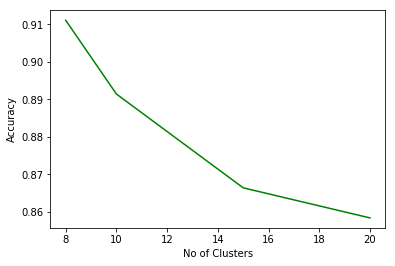

In [15]:
plt.plot(clusters,accuracy, color='g')
plt.xlabel('No of Clusters')
plt.ylabel('Accuracy')
#plt.title('Accuracy')
plt.show()

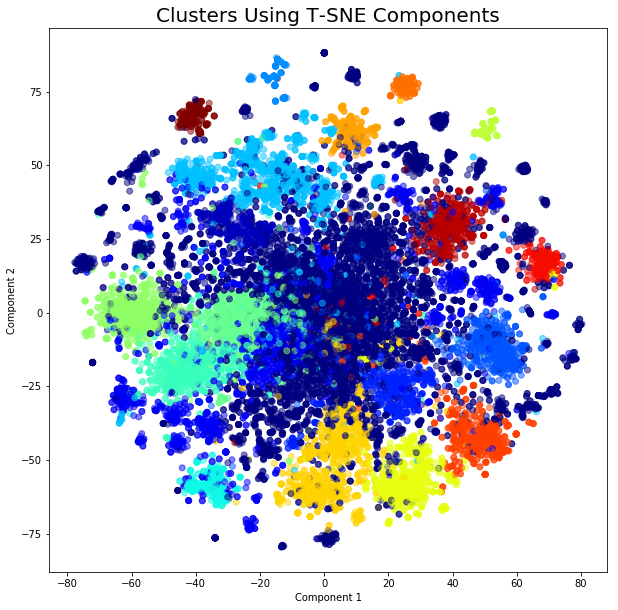

In [11]:
# Look at clusters

from sklearn.manifold import TSNE

tsne = TSNE()
g = pd.DataFrame(tsne.fit_transform(comps), columns=['one', 'two'])


g['cluster_no'] = cltr3.labels_

import matplotlib.cm as cm

plt.figure(figsize=(10,10))
plt.title('Clusters Using T-SNE Components', fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(g['one'], g['two'], c=g['cluster_no'], cmap=cm.jet, alpha=0.5)

plt.show()

In [9]:
lr.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# Assign cluster number to each job title in comps to pull particular cluster out for comparison
comps['cluster_no'] = y.values
comps.set_index('cluster_no', inplace=True)

In [39]:
resume_text = '''jesus.brown3255@gmail.com SUMMARY:I am  a passion for using data to make faster and betterdecisions that leads to improved customer experiences and increased productivity. My combination oftechnical and business experience provides a unique skill-set to be able to work cross-functionally toachieve these results.SKILLSTECHNICAL:Java, Python (Pandas, Scikit-Learn, NumPy, Seaborn), Data Analytics , Big Data (AWS, Hadoop, Spark), Tableau,Advanced Microsoft Excel (Power BI, Macros, etc.) ·Student- DataScience·Oct2016 - Learned the skills to become a data professional including Python (Pandas, Numpy, Seaborn, Scikit-Learn), Advanced SQL,  No-SQL (MongoDB), MachineLearning Modeling , Big Data (AWS, Hadoop, Spark)
'''

In [49]:
def give_suggestions(resume_text):
    matches=dict()
    # Vectorize user's skills and job descriptions
    desc = pd.DataFrame(vec.transform([resume_text]).todense())
    desc.columns = vec.get_feature_names()
    skillz = pd.DataFrame(vec2.transform([resume_text]).todense())
    skillz.columns = vec2.get_feature_names()
    mat = pd.concat([skillz, desc], axis=1)
    # Tranform feature matrix with pca
    user_comps = pd.DataFrame(pca.transform(mat))

    # Predict cluster for user and print cluster number
    cluster = lr.predict(user_comps)[0]
    print ('CLUSTER NUMBER', cluster, '\n\n')

    # Calculate cosine similarity
    cos_sim = pd.DataFrame(cosine_similarity(user_comps,comps[comps.index==cluster]))

    # Get job titles from df to associate cosine similarity scores with jobs
    samp_for_cluster = df[df['cluster_no']==cluster]
    cos_sim = cos_sim.T.set_index(samp_for_cluster['jobtitle'])
    cos_sim.columns = ['score']
    
    # Print the top ten suggested jobs for the user's cluster
    print ('Top ten suggested for your cluster', '\n', cos_sim.sort_values('score', ascending=False)[:10], '\n\n')
   # print('Accuracy',)

    # Print the top five suggested jobs for each cluster
    mat = mat.T
    for i in range(8):
        cos_sim = pd.DataFrame(cosine_similarity(user_comps,comps[comps.index==i]))
        samp_for_cluster = df[df['cluster_no']==i]
        cos_sim = cos_sim.T.set_index(samp_for_cluster.index)
        cos_sim.columns = ['score']
        top_5 = cos_sim.sort_values('score', ascending=False)[:5]

        # Merge top_5 with sample2 to get skills and description
        merged_top_5 = top_5.merge(df, how='left', left_index=True, right_index=True)
        print ('---------Top five suggested in cluster', i,  '---------\n', top_5, '\n\n')
        # Vectorize to find skills needed for each job title
       
        for job in merged_top_5.index:
            job_skills = pd.DataFrame(vec2.transform([merged_top_5.ix[job]['jobdescription']+merged_top_5.ix[job]['skills']]).todense())
            job_skills.columns = vec2.get_feature_names()
            job_skills = job_skills.T
            job_skills.columns = ['score']
            job_skills = job_skills[job_skills['score'] != 0].sort_values('score', ascending=False)
            mat.columns = ['score']
            mat = mat[mat['score'] != 0]
            needed_skills = []
            scorey = []
            for i in job_skills.index:
                if i not in mat.index:    
                    needed_skills.append(i)
                    scorey.append(job_skills.ix[i][0])
            top_skills = pd.DataFrame(list(zip(needed_skills, scorey)), columns=['Skills', 'Importance'])
            print('To become a/an', job,',', '\n', 'these are the top ten skills you need:', '\n')
            print(top_skills[:5], '\n')

In [55]:
resume_text=input("Enter your skills. These are programming languages, frameworks,platforms or databases that you have experience with")

Enter your skills. These are programming languages, frameworks,platforms or databases that you have experience withpython javascript


In [56]:
give_suggestions(resume_text)

CLUSTER NUMBER 0 


Top ten suggested for your cluster 
                                                        score
jobtitle                                                    
Senior Developer - HEAVILYFunded, Revolutionary...  0.620788
SW test Python c/c++                                0.596062
Senior Python Developer                             0.561360
Python Developer                                    0.559469
Python Developer                                    0.559075
Python Developer for FinTech start up               0.548576
Python Developer                                    0.519687
c/c++ Python Mathematics                            0.512534
Javascript/Node.js Developer (Full stack)           0.493980
Python Developer                                    0.491289 


---------Top five suggested in cluster 0 ---------
           score
461    0.620788
3496   0.596062
19432  0.561360
14008  0.559469
11511  0.559075 


To become a/an 461 , 
 these are the top ten skills you n

In [58]:
def intra_list_similarity(predicted, feature_df):
    feature_df = feature_df.fillna(0)
    Users = range(len(predicted))
    ils = [_single_list_similarity(predicted[u], feature_df) for u in Users]
    return np.mean(ils)
top_10_recommendations=cos_sim.sort_values('score', ascending=False)[:10]
feature_df = df[['jobtitle','jobdescription']]
intra_list_similarity(top_10_recommendations, feature_df)

0.945832094818959
